Prepoznavanje cifara na slici
- potrebno je prepoznati (rucno na neki nacin) koja je cifra prikazana na slici
- dakle, algoritam prima neku sliku i na osnovu toga prepoznaje koja je cifra
- potrebno je da algoritam uci na neki nacin da bismo znali koja je cifra na slici, u pocetku vise grijesi 
- nakon toga za veci dataset moze sam prepoznati koja je cifra na slici, cak i na novoj slici koja je nova proslijedjena
- skup podataka na kojem algoritam uci to je training set
- kako mozemo zakljuciti koliko je dobar algoritam? koliko puta pogodi na skupu koji nije training set, tj. test set
- kada istreniramo model na test setu provjeravamo koliko je algoritam dobar
- preciznost se zove metrika u produkciji 
- za test i training set mora vrijediti da su disjunktni (nema preklapanja) i moraju imati istu neku distribuciju (na nacin da predstavljaju istu stvar, npr. crno bijele slike, ali ne smiju sadrzavati iste slike)
- model zavisi od primjene
- jedan model je npr. chatgpt odnosno chatgpt model
- npr. modeli su linearna regresija, neuralne mreze itd.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("./data/Housing.csv")
# prikaz prvih 10 redova
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [3]:
# dimenzionalnost seta podataka
data.shape

(545, 13)

In [4]:
# popis index vrijednosti redova dataframe-a
data.index

RangeIndex(start=0, stop=545, step=1)

In [5]:
# informacije o setu podataka
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
# pristup pojedinacnim redovima dataframe-a
data.iloc[[5]]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished


In [7]:
# pristup pojedinacnim kolonama
data.iloc[:,[3]]

,bathrooms
0,2
1,4
2,2
3,2
4,1
...,...
540,1
541,1
542,1
543,1


In [8]:
# pristup pojedinacnim kolonama na osnovu imena
data["bathrooms"]

0      2
1      4
2      2
3      2
4      1
      ..
540    1
541    1
542    1
543    1
544    1
Name: bathrooms, Length: 545, dtype: int64

In [9]:
# pristup pojedinacnim vrijednostima
data.iloc[[5],[3]]

,bathrooms
5,3


In [10]:
# prikaz dijela skupa podataka (prvih 10 redova i kolone sa indeksom 5 do 10)
data.iloc[:10,5:10]

,mainroad,guestroom,basement,hotwaterheating,airconditioning
0,yes,no,no,no,yes
1,yes,no,no,no,yes
2,yes,no,yes,no,no
3,yes,no,yes,no,yes
4,yes,yes,yes,no,yes
5,yes,no,yes,no,yes
6,yes,no,no,no,yes
7,yes,no,no,no,no
8,yes,yes,yes,no,yes
9,yes,yes,no,no,yes


In [11]:
# prikaz dijela seta podataka na osnovu uslova nad vrijednostima neke kolone
data.loc[data["price"]>10000000].head(20)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished


In [12]:
# alternativni nacin je postavljanje upita
data.query("price>10000000")

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished


In [13]:
# brisanje kolone iz seta podataka
data = data.drop(columns = ['hotwaterheating'])
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,yes,2,no,furnished


## Vrijednosti kategoričnih varijabli

In [14]:
data["mainroad"].value_counts()
# data["guestroom"].value_counts()
# data["basement"].value_counts()
# data["hotwaterheating"].value_counts()
# data["airconditioning"].value_counts()
# data["prefarea"].value_counts()
# data["furnishingstatus"].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

## Osobine brojčanih varijabli

In [15]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


##  Histogrami brojčanih varijabli

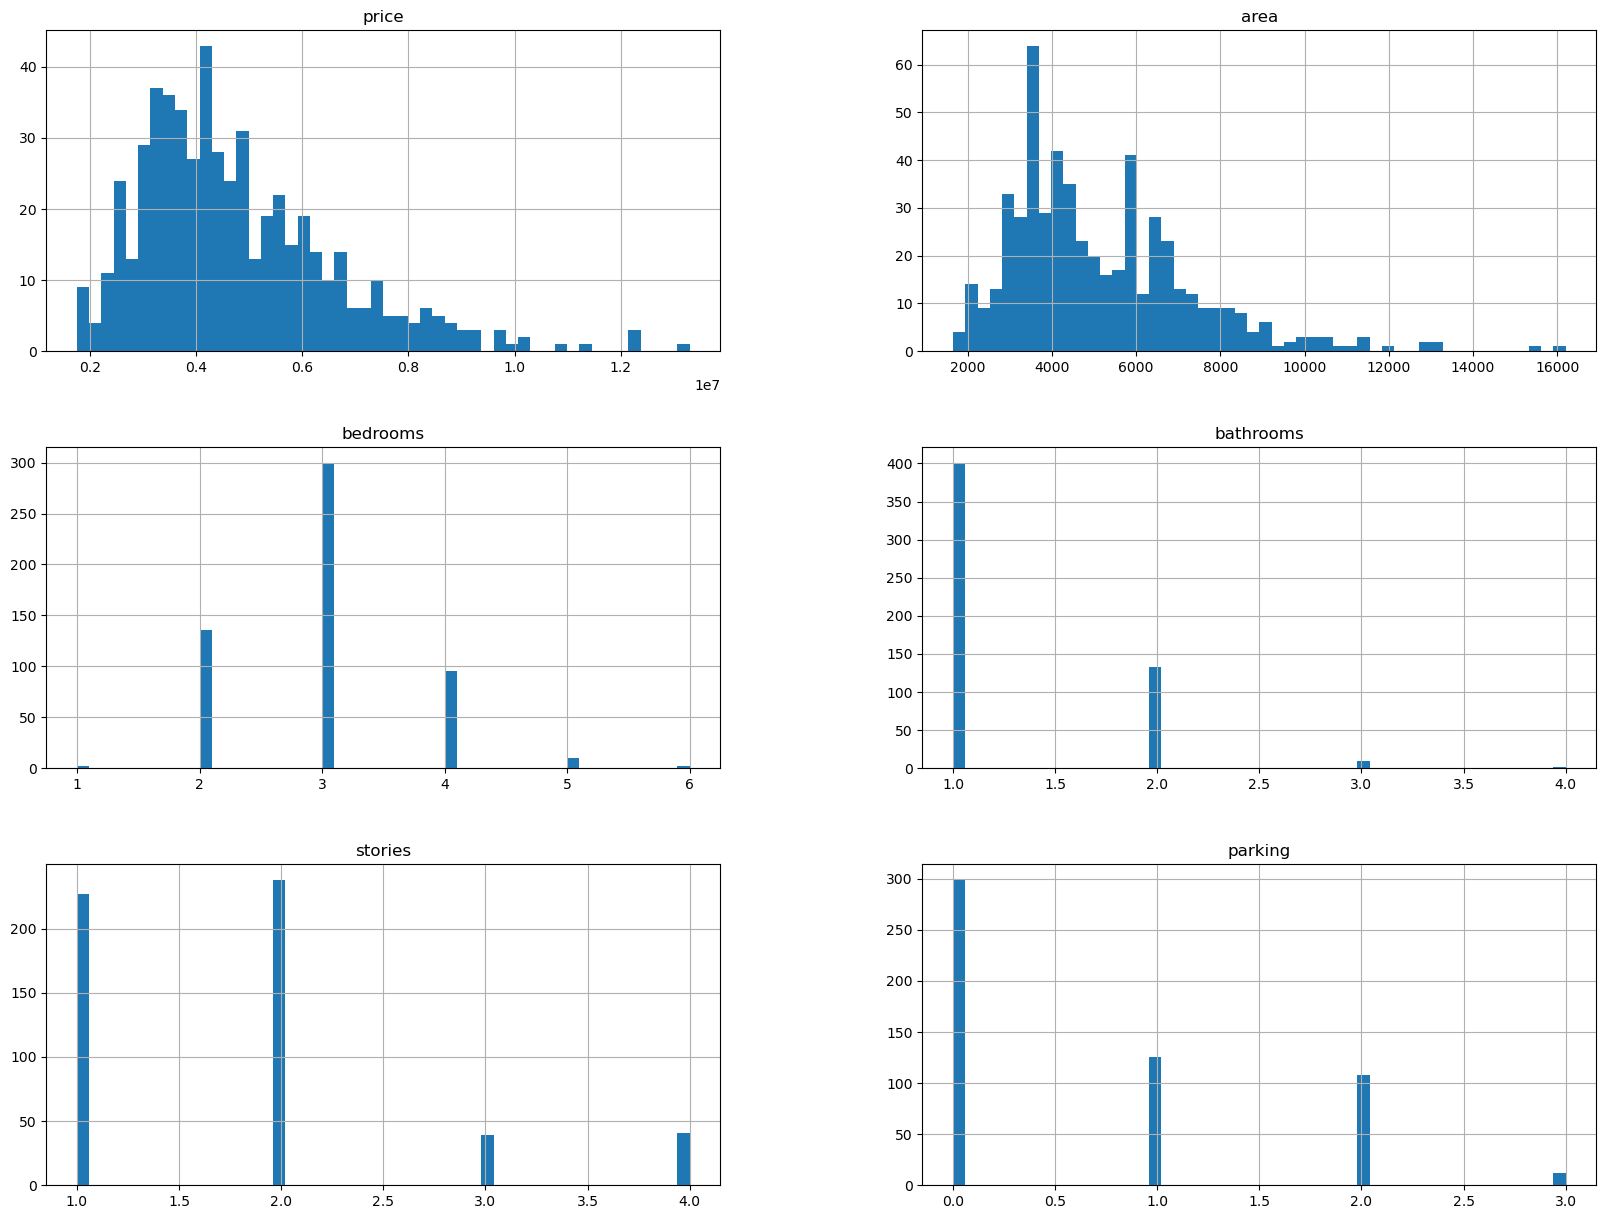

In [16]:
data.hist(bins = 50, figsize = (20,15))
plt.show()

## Grafici

<Axes: xlabel='price'>

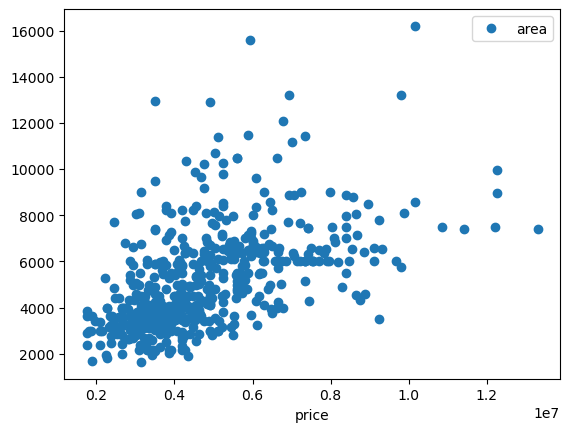

In [17]:
data.plot(x='price', y='area', style='o')


## Pravljenje testnog seta podataka


In [18]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
test_set.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
316,4060000,5900,4,2,2,no,no,yes,no,1,no,unfurnished
77,6650000,6500,3,2,3,yes,no,no,yes,0,yes,furnished
360,3710000,4040,2,1,1,yes,no,no,no,0,no,semi-furnished
90,6440000,5000,3,1,2,yes,no,no,yes,0,no,semi-furnished
493,2800000,3960,3,1,1,yes,no,no,no,0,no,furnished


In [28]:
# ILI pomocu pandas biblioteke
#kopiju smo kreirali samo zbog brisanja
data_copy = data.copy()
train_set = data_copy.sample(frac=0.8, random_state=42)
# kopiramo cijeli dataset i iz njega brisemo sve indexe koji su selektovani u prethodnoj liniji
test_set = data_copy.drop(train_set.index)
test_set.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
1,12250000,8960,4,4,4,yes,no,no,yes,3,no,furnished
8,9870000,8100,4,1,2,yes,yes,yes,yes,2,yes,furnished
13,9240000,3500,4,2,2,yes,no,no,no,2,no,furnished
14,9240000,7800,3,2,2,yes,no,no,no,0,yes,semi-furnished
20,8750000,4320,3,1,2,yes,no,yes,no,2,no,semi-furnished


In [31]:
# ili pomocu numpy biblioteke
# kreiramo prvo masku (maska je niz nula i jedinica)
# x=[1,2,3,4,5] mask=[0,0,1,0,1] nase x[mask]=[3,5] za jedinice
mask = np.random.rand(len(data)) < 0.8 # vraca nam novi niz, gdje za svaki niz poredimo da li je taj broj manji od 0.8 i dobijamo true ili false u odnosu da li je nejednakost zadovoljena, imamo uniformnu distribuciju nasumicnog broja i 80% slucajeva otprilike ce imati true vrijednost
# np.random.rand(len(data)) kreira niz random brojeva od 0 do duzine niza
train_set = data[mask]
test_set = data[~mask]
test_set.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
6,10150000,8580,4,3,4,yes,no,no,yes,2,yes,semi-furnished
14,9240000,7800,3,2,2,yes,no,no,no,0,yes,semi-furnished
17,8960000,8500,3,2,4,yes,no,no,yes,2,no,furnished
20,8750000,4320,3,1,2,yes,no,yes,no,2,no,semi-furnished
25,8540000,6540,4,2,2,yes,yes,yes,yes,2,yes,furnished


In [24]:
# buduci da su nam sada izmijesani indexi, tj. uzeti iz originalne tabele potrebno je da resetujemo indexe i dropamo
# stare indexe
test_set = test_set.reset_index(drop=True)
test_set.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
0,10150000,8580,4,3,4,yes,no,no,yes,2,yes,semi-furnished
1,9800000,5750,3,2,4,yes,yes,no,yes,1,yes,unfurnished
2,9310000,6550,4,2,2,yes,no,no,yes,1,yes,semi-furnished
3,8680000,7155,3,2,1,yes,yes,yes,yes,2,no,unfurnished
4,8463000,6000,3,2,4,yes,yes,yes,yes,0,yes,semi-furnished


## Priprema podataka prije treniranja

## Čišćenje podataka


In [37]:
data.isnull().values.any() 
# data.isnull() provjerava null vrijednosti u tabeli tj. u nekoj od celija
# data.isnull().values vrati niz sa boolean vrijednostima 
# data.isnull.values.any() vrati true ako postoji bar jedan null, false inace


False

In [26]:
data.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64